In [1]:
#data loading
import pandas as pd
filename="/content/Cowles.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames  neuroticism  extraversion     sex volunteer
0            1           16            13  female        no
1            2            8            14    male        no
2            3            5            16    male        no
3            4            8            20  female        no
4            5            9            19    male        no
...        ...          ...           ...     ...       ...
1416      1417            5            10    male       yes
1417      1418            8             4  female       yes
1418      1419            8             8    male       yes
1419      1420           19            20  female       yes
1420      1421           15            20    male       yes

[1421 rows x 5 columns]


In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
neuroticism,0
extraversion,0
sex,0
volunteer,0


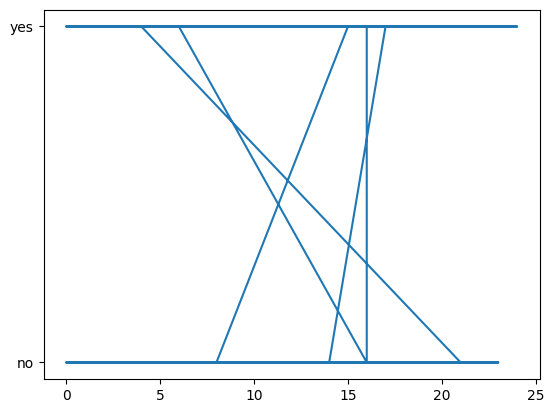

In [4]:
from matplotlib import pyplot as plt
target="volunteer"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 1421 artists>

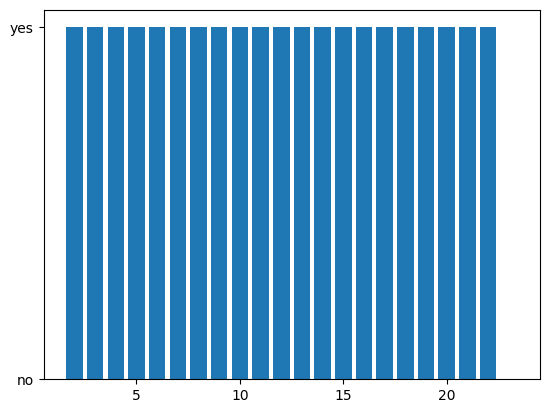

In [5]:
plt.bar(a[a.columns[2]],a[str(target)])

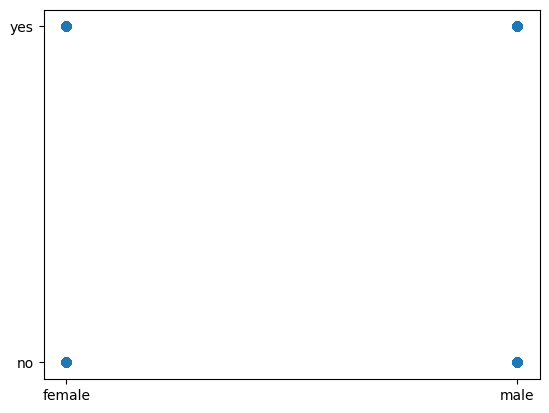

In [6]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={3,4}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  neuroticism  extraversion  sex  volunteer
0            1           16            13    0          0
1            2            8            14    1          0
2            3            5            16    1          0
3            4            8            20    0          0
4            5            9            19    1          0
...        ...          ...           ...  ...        ...
1416      1417            5            10    1          1
1417      1418            8             4    0          1
1418      1419            8             8    1          1
1419      1420           19            20    0          1
1420      1421           15            20    1          1

[1421 rows x 5 columns]


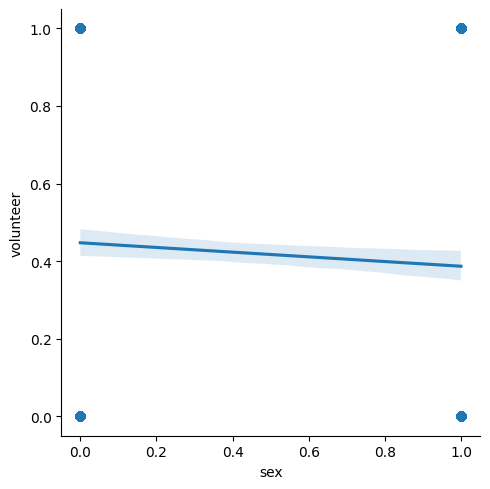

In [10]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="sex",y=str(target),data=a)

<Axes: xlabel='neuroticism', ylabel='volunteer'>

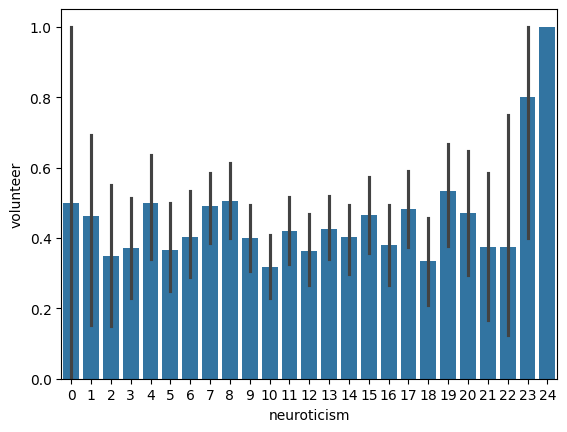

In [11]:
sns.barplot(x=a.columns[1],y=str(target),data=a)

<Axes: xlabel='extraversion', ylabel='volunteer'>

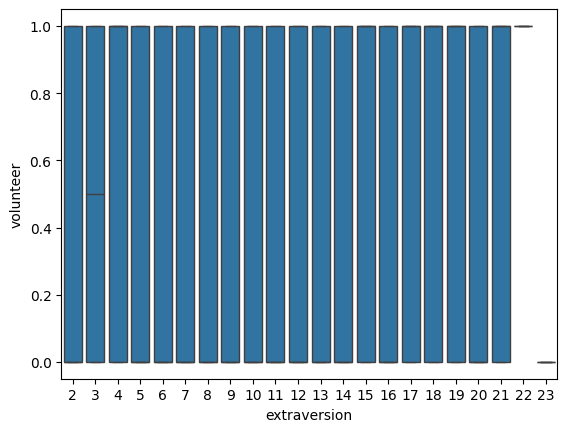

In [12]:
sns.boxplot(x=a.columns[2],y=str(target),data=a)

<ipython-input-13-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='volunteer', ylabel='Density'>

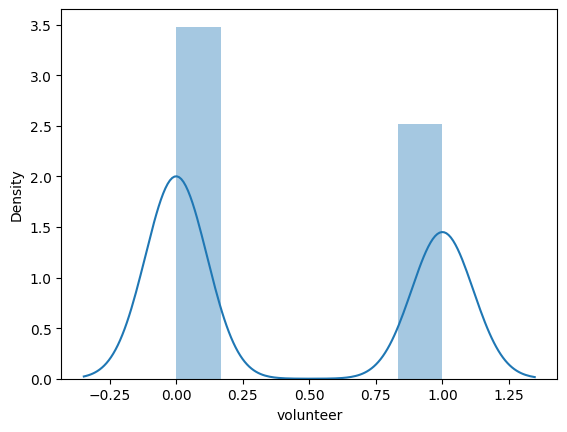

In [13]:
sns.distplot(a[str(target)])

<Axes: xlabel='neuroticism', ylabel='Density'>

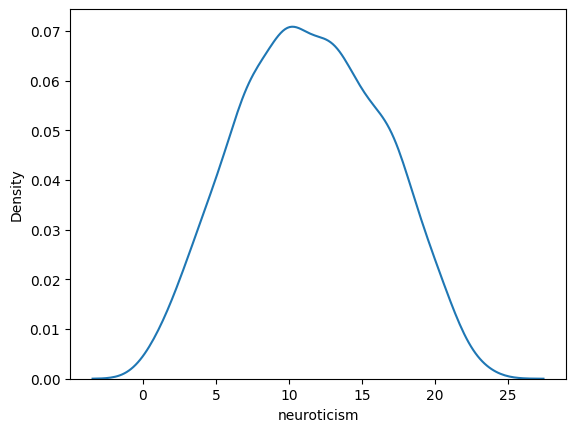

In [14]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='volunteer', ylabel='count'>

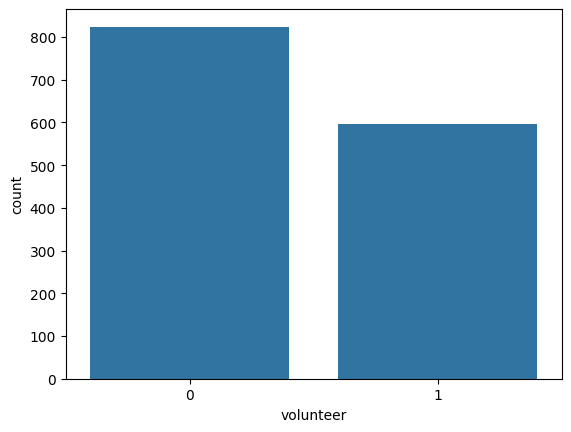

In [15]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

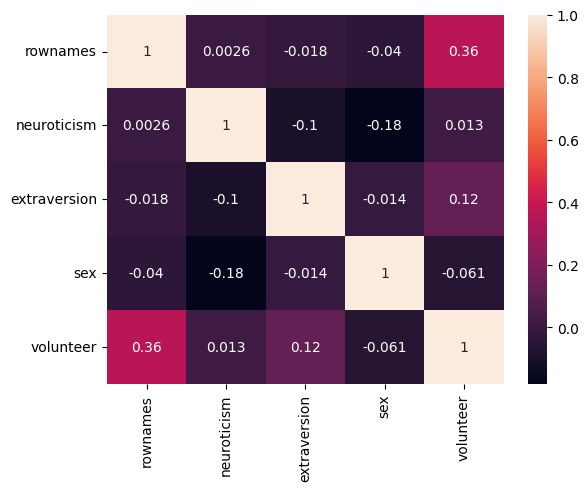

In [17]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

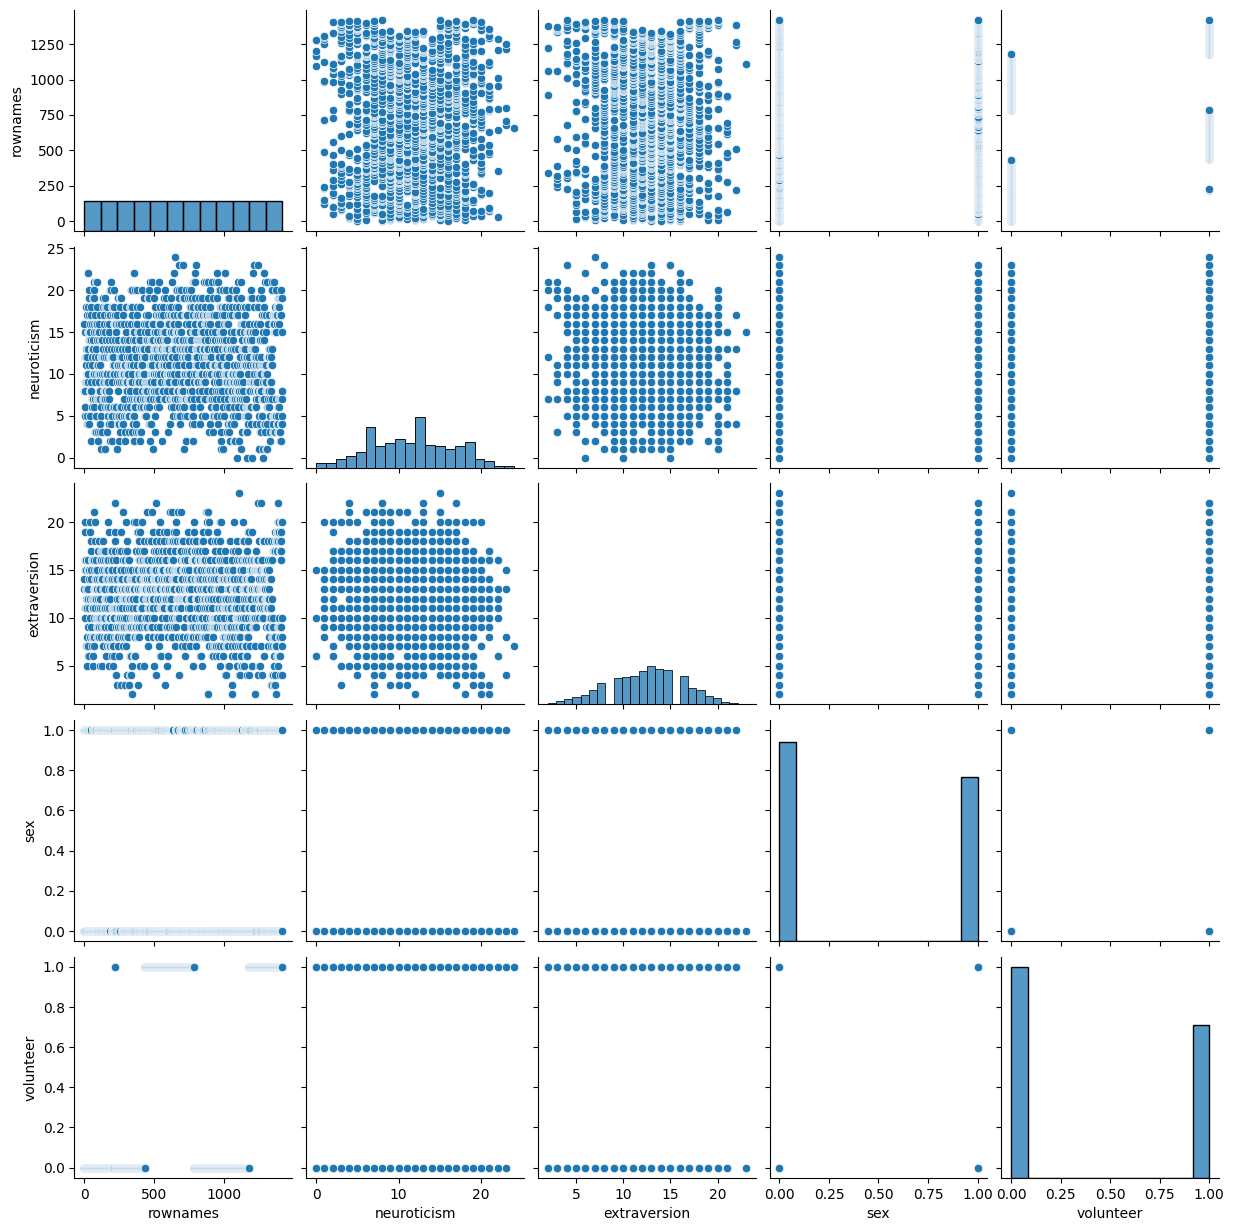

In [18]:
sns.pairplot(data=a)

In [19]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  neuroticism  extraversion  sex
0            1           16            13    0
1            2            8            14    1
2            3            5            16    1
3            4            8            20    0
4            5            9            19    1
...        ...          ...           ...  ...
1416      1417            5            10    1
1417      1418            8             4    0
1418      1419            8             8    1
1419      1420           19            20    0
1420      1421           15            20    1

[1421 rows x 4 columns]


In [20]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1416    1
1417    1
1418    1
1419    1
1420    1
Name: volunteer, Length: 1421, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
print(x_train)

      rownames  neuroticism  extraversion  sex
1337      1338           12            18    0
1354      1355            3            10    0
230        231            6            15    1
498        499           15            14    0
403        404           11            11    1
...        ...          ...           ...  ...
1160      1161           11             7    0
829        830            6            14    0
1051      1052           10            12    0
318        319           12            16    1
613        614            7            11    1

[1136 rows x 4 columns]


In [23]:
print(y_train)

1337    1
1354    1
230     0
498     1
403     0
       ..
1160    0
829     0
1051    0
318     0
613     1
Name: volunteer, Length: 1136, dtype: int64


In [24]:
print(x_test)

      rownames  neuroticism  extraversion  sex
93          94            7            15    0
391        392           13            17    0
1189      1190            6            15    1
361        362           13             9    1
622        623           15            11    1
...        ...          ...           ...  ...
388        389            3             8    1
782        783            6            18    1
504        505            3            13    1
493        494            8            19    1
36          37           17            14    0

[285 rows x 4 columns]


In [25]:
print(y_test)

93      0
391     0
1189    1
361     0
622     1
       ..
388     0
782     1
504     1
493     1
36      0
Name: volunteer, Length: 285, dtype: int64


In [26]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [27]:
print(ypred)

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0]


In [28]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.5789473684210527


In [29]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[123  46]
 [ 74  42]]


In [32]:
print(model.predict([[94,7,15,0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [34]:
print(ypred)

[0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0]


In [35]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9894736842105263


In [36]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[169   0]
 [  3 113]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       169
           1       1.00      0.97      0.99       116

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285



In [38]:
print(model.predict([[94,7,15,0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [40]:
print(ypred)

[0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0]


In [ ]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

1.0


In [41]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[169   0]
 [  3 113]]


In [43]:
print(model.predict([[94,7,15,0]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       169
           1       1.00      0.97      0.99       116

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285

